In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

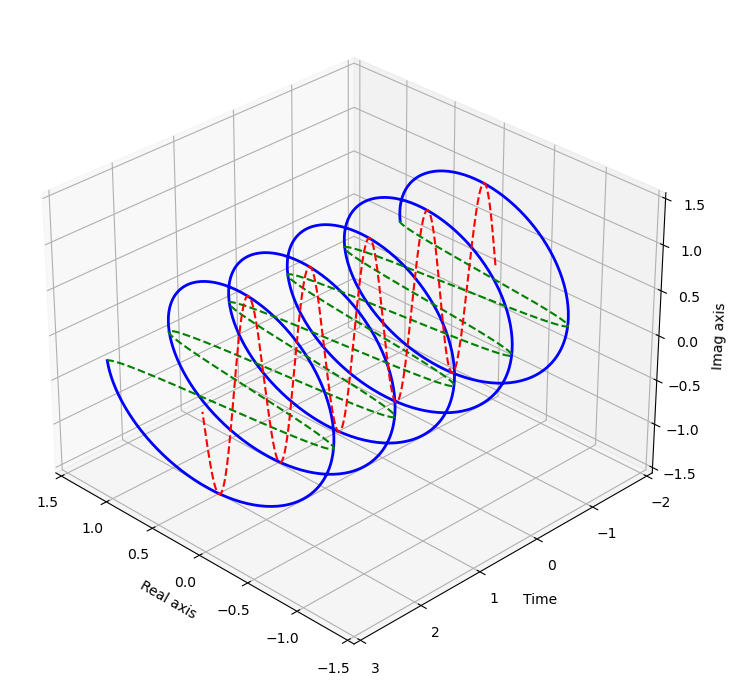

In [9]:
# Parameter
f0 = 1  # Frequenz in Hz
t = np.linspace(-2, 3, 1000)
omega = 2 * np.pi * f0

# Komplexes Signal
x_real = np.cos(omega * t)
x_imag = np.sin(omega * t)

# 3D-Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d', facecolor="none")


# Hauptkurve: komplexe Exponentialfunktion e^{jωt}
ax.plot(x_real, t, x_imag, color='blue', label=r'$e^{j 2 \pi f_0 t}$', linewidth=2)

# Projektion auf Real-Zeit-Ebene (cos)
ax.plot(x_real, t, np.zeros_like(t), color='green', linestyle='--', label=r'$\cos(2\pi f_0 t)$')

# Projektion auf Imaginär-Zeit-Ebene (sin)
ax.plot(np.zeros_like(t), t, x_imag, color='red', linestyle='--', label=r'$\sin(2\pi f_0 t)$')
ax.set_facecolor("none")
# Achsenbeschriftung
ax.set_xlabel('Real axis')
ax.set_ylabel('Time')
ax.set_zlabel('Imag axis')

# Achsenskalierung
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([t[0], t[-1]])
ax.set_zlim([-1.5, 1.5])

# Blickwinkel setzen (elev: nach oben, azim: horizontal)
ax.view_init(elev=30, azim=135)

# Legende und Titel
plt.tight_layout()
plt.gca().set_facecolor('none')
plt.show()


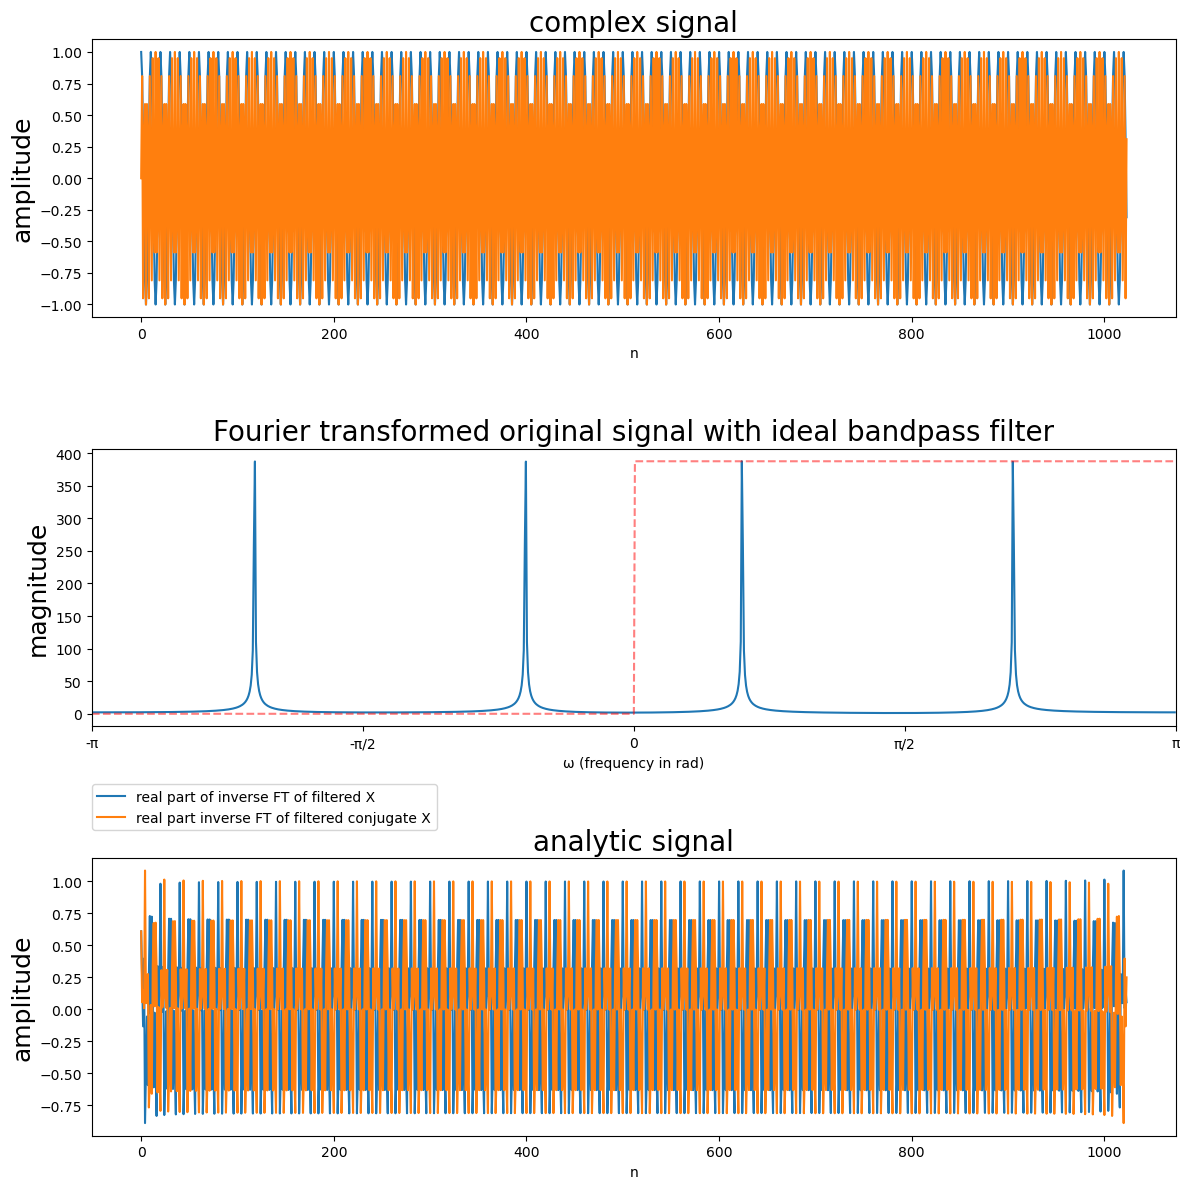

In [7]:
# Neues komplexes Signal bestehend aus zwei Frequenzen mit unterschiedlicher Phase
N = 1024
n = np.arange(N)
fs = 1.0  # Normalisierte Abtastrate, damit Kreisfrequenzen in [-π, π]

# Zwei Frequenzen mit unterschiedlichen Phasen
w1, w2 = 0.2 * np.pi, 0.7 * np.pi
signal_real = np.cos(w1 * n)
signal_imag = np.sin(w2 * n)
x = signal_real + 1j * signal_imag  # Komplexes Signal

# Fourier-Transformation
X = np.fft.fftshift(np.fft.fft(x))
omega = np.fft.fftshift(np.fft.fftfreq(N, d=1/fs)) * 2 * np.pi  # Kreisfrequenzachse

# Idealbandpassfilter: 1 für ω ∈ (0, π), 0 für ω ∈ (-π, 0]
bandpass = (omega > 0).astype(float)

# Anwendung auf X und conj(X)
X_pos = X * bandpass
X_neg = np.conj(X) * bandpass

# Rücktransformationen in den Zeitbereich
x_pos = np.fft.ifft(np.fft.ifftshift(X_pos))
x_neg = np.fft.ifft(np.fft.ifftshift(X_neg))

# Plot
fig, axs = plt.subplots(3, 1, figsize=(12, 12), facecolor="none")
for ax in axs:
    ax.set_facecolor("none")

axs[0].plot(n, np.real(x), label='real part')
axs[0].plot(n, np.imag(x), label='imaginary part')
axs[0].set_title("complex signal", fontsize=20)
axs[0].set_xlabel("n")
axs[0].set_ylabel("amplitude", fontsize=18)

axs[1].plot(omega, np.abs(X))
axs[1].plot(omega, bandpass * np.max(np.abs(X)), '--r', alpha=0.5)
axs[1].set_title("Fourier transformed original signal with ideal bandpass filter", fontsize=20)
axs[1].set_xlabel("ω (frequency in rad)")
axs[1].set_ylabel("magnitude", fontsize=18)
axs[1].set_xlim([-np.pi, np.pi])
axs[1].set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
axs[1].set_xticklabels(['-π', '-π/2', '0', 'π/2', 'π'])

axs[2].plot(n, np.real(x_pos), label="real part of inverse FT of filtered X")
axs[2].plot(n, np.real(x_neg), label="real part inverse FT of filtered conjugate X")
axs[2].set_title("analytic signal", fontsize=20)
axs[2].set_xlabel("n")
axs[2].set_ylabel("amplitude", fontsize=18)
axs[2].legend(loc=(0,1.1))

plt.tight_layout()
plt.show()
